# Exploratory Data Analysis , Feature Engineering & Model Building using California Housing Price Dataset

### Loading the dataset

In [2]:
# importing essential libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset from sklearn

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Performing EDA (Exploratory Data Analysis)

In [4]:
# Checking for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


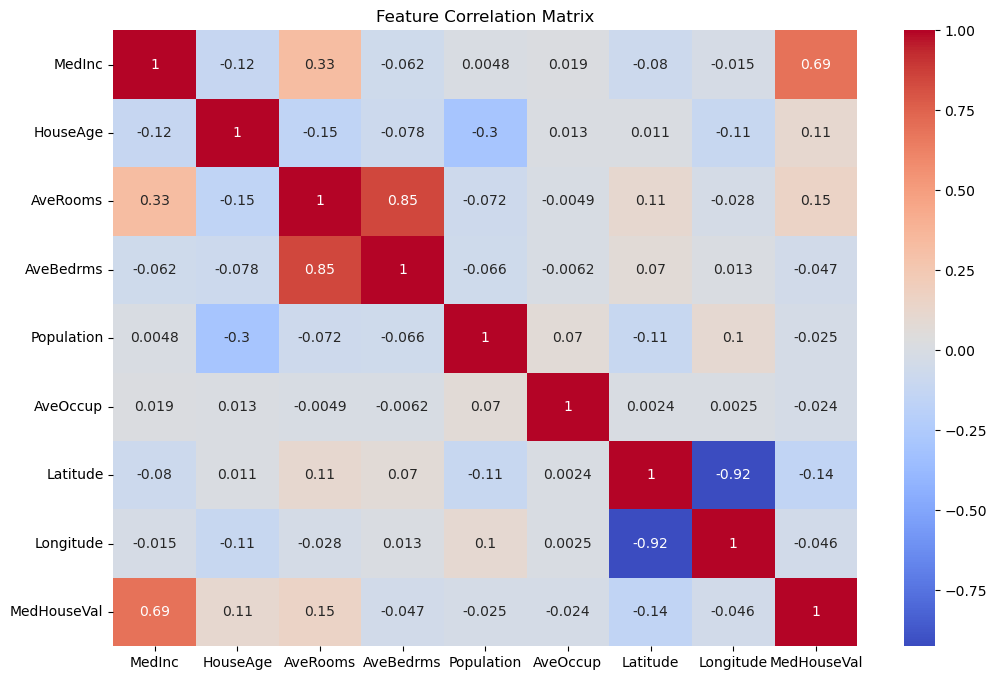

In [6]:
# Correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# helps to understand the correlation of various fetaures with each other

### Model Building

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X = df.drop(columns=["MedHouseVal"]) # feature variables
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

# predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("r2 Score:", r2_score(y_test, y_pred))


# since linear regression is giving very low r2 score and MAE we will have
# to try Ridge and Lasso regressions to find any possible improvement in 
# the model performance

MAE: 0.5332001304956565
r2 Score: 0.575787706032451


In [8]:
from sklearn.linear_model import Ridge, Lasso 

# Ridge Regression

ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("r2 Score:", r2_score(y_test, y_pred_ridge))

r2 Score: 0.5758157428913682


In [9]:
# Lasso Regression

lasso = Lasso(alpha=0.005)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("r2 score:", r2_score(y_test, y_pred_lasso))

r2 score: 0.5800901498961875


In [10]:
## both ridge and lasso show only a slight improvement in r2 score even after experimenting with various alpha values
# Now we will perform Feature Selection ( selecting important features as some features might be weak predictors can effect the overall performance of the model
# for checking the feature importance we will be using the lasso's coefficient

import numpy as np

# Print feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

# lasso coef of Population feature which is the least important features and has only a negligible impact
# so we will drop this feature and then retrain Linear, Lasso, and Ridge models to see if performance improves.

MedInc        0.827792
AveBedrms     0.272853
HouseAge      0.125211
Population   -0.000000
AveOccup     -0.035810
AveRooms     -0.228632
Longitude    -0.812363
Latitude     -0.843018
dtype: float64


In [11]:
X_selected = X.drop(columns=["Population"]) # Dropping weak feature

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Evaluate the performance
print("Updated Model MAE:", mean_absolute_error(y_test, y_pred))
print("Updated Model R² Score:", r2_score(y_test, y_pred))

# comparing the retrained linear regression model with the previous regression model
# even after feature selection the model hasn't made a slight improvement 

Updated Model MAE: 0.533206090935766
Updated Model R² Score: 0.5757407466176082


In [12]:
# Lets try Random Forest Regression Model and check for any improvement in performance 

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


# Random Forest performance is much better than Linear Regression, Ridge and even Lasso

Random Forest R² Score: 0.8046976064199525


In [14]:
# We will use RandomizedSearchCV for hyperparameter tuning which will help us improve the accuracy of the model even better

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [5, 10, 15, None], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'], 
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=15,  
    cv=3,  
    scoring='r2',  
    n_jobs=-1,  
    error_score='raise', 
    random_state=42
)

random_search.fit(X_train, y_train)


# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("R² Score after hyperparameter tuning:", random_search.best_score_)


Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
R² Score after hyperparameter tuning: 0.8143740978493833


Tuned Random Forest model achieved an R² score of 0.814, which is a solid improvement.

In [17]:
# Saving the final model

import joblib

# get the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# save the model to a file
joblib.dump(best_rf_model,'random_forest_model.pkl')

print("Model saved successfully")

Model saved successfully
